In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

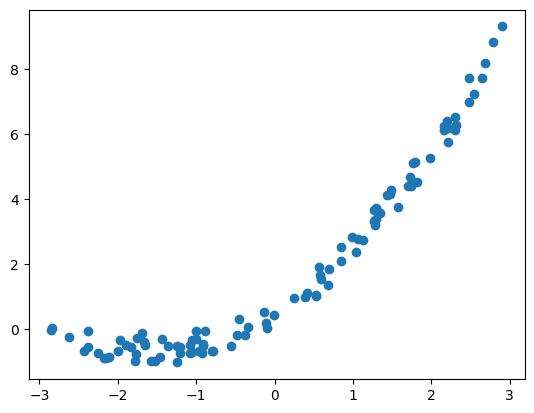

In [3]:
X = 6* np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + np.random.rand(100,1)
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
# implementing linear regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()
regression_1.fit(X_train,y_train)

LinearRegression()

In [6]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression_1.predict(X_test))
print(score)

0.8837283422539409


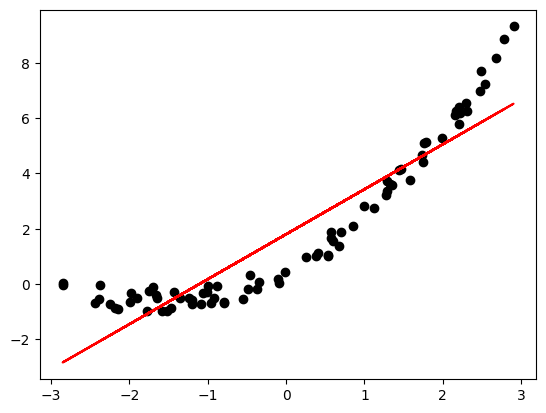

In [7]:
plt.scatter(X_train,y_train, color='black')
plt.plot(X_train,regression_1.predict(X_train), color='red')

In [8]:
# implementing polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [9]:
X_train_poly

array([[ 1.00000000e+00,  4.07715531e-01,  1.66231954e-01],
       [ 1.00000000e+00,  2.29881659e+00,  5.28455771e+00],
       [ 1.00000000e+00,  5.33615725e-01,  2.84745742e-01],
       [ 1.00000000e+00,  1.47081752e+00,  2.16330416e+00],
       [ 1.00000000e+00, -9.61741782e-01,  9.24947255e-01],
       [ 1.00000000e+00, -5.54270269e-01,  3.07215531e-01],
       [ 1.00000000e+00,  1.29141476e+00,  1.66775207e+00],
       [ 1.00000000e+00, -9.69178491e-03,  9.39306948e-05],
       [ 1.00000000e+00,  1.57675728e+00,  2.48616353e+00],
       [ 1.00000000e+00, -2.37771838e+00,  5.65354470e+00],
       [ 1.00000000e+00, -1.65066198e+00,  2.72468497e+00],
       [ 1.00000000e+00, -3.71486949e-01,  1.38002553e-01],
       [ 1.00000000e+00,  8.51982391e-01,  7.25873994e-01],
       [ 1.00000000e+00, -1.05384728e+00,  1.11059408e+00],
       [ 1.00000000e+00, -1.46304528e+00,  2.14050150e+00],
       [ 1.00000000e+00,  1.74579167e+00,  3.04778857e+00],
       [ 1.00000000e+00, -1.24149758e+00

In [10]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.9894279139429597


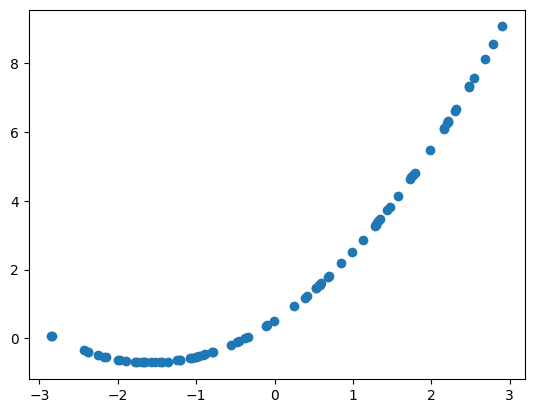

In [18]:
# plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_poly))

In [19]:
print(regression.coef_)

[[0.         1.53953737 0.48517447]]


In [20]:
print(regression.intercept_)

[0.51633873]


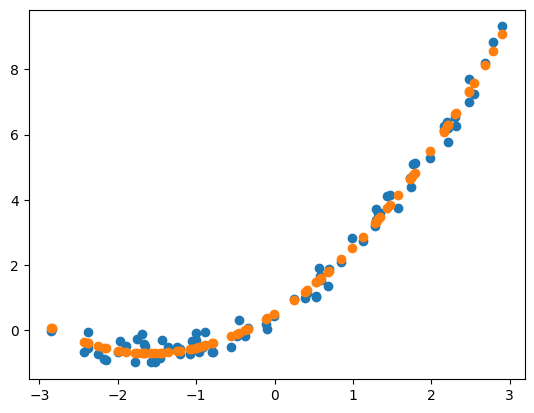

In [21]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_poly))

In [24]:
# prediction of new dataset
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

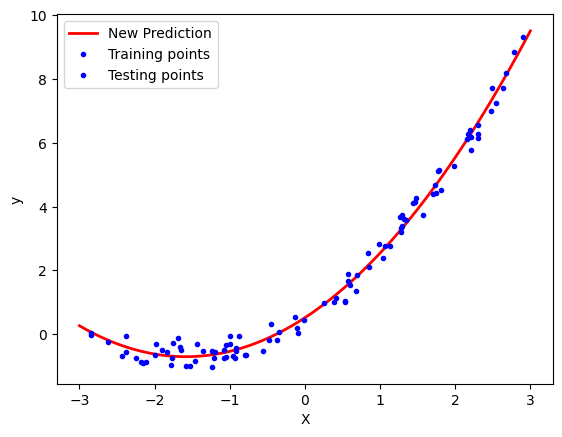

In [25]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new,y_new,'r-',linewidth=2,label='New Prediction')
plt.plot(X_train,y_train,'b.',label='Training points')
plt.plot(X_test,y_test,'b.',label='Testing points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()